In [277]:
import pandas as pd
import numpy as np

In [278]:
df = pd.read_csv("/content/rent.csv")

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [280]:
df.shape

(4746, 12)

In [281]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [282]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [283]:
df.rename(columns={'Posted On': 'datetime',
                        'BHK':'number_of_bedroom',
                        'Rent':'price',
                        'Size':'size_in_sqft',
                        'Area Type':'area_type',
                        'City':'city',
                        'Furnishing Status':'furnishing',
                        'Tenant Preferred':'tenant_preferred',
                        'Bathroom':'number_of_bathroom',
                        'Point of Contact':'contact',
                        }, inplace=True)

In [284]:
# date time conversion.
df['datetime'] = pd.to_datetime(df.datetime)

# categorical variables
df['tenant_preferred'] = df['tenant_preferred'].astype('category')
df['furnishing'] = df['furnishing'].astype('category')

In [285]:
df['month'] = df['datetime'].dt.month.astype('category')

In [286]:
def get_floor_num(x):
    if len(x.split(' ')) == 4:
        value = x.split(' ')[0].strip()
        if value == 'Ground':
            return 0
        return value

def get_num_of_floors(x):
    if len(x.split(' ')) >= 4:
        return x.split(' ')[-1]
    else:
        return np.nan

df['floor'] = df['Floor'].apply(lambda x: get_floor_num(x))
df['total_floors'] = df['Floor'].apply(lambda x: get_num_of_floors(x))

In [287]:
df['price_per_sqft'] = np.round(df['price'] / df['size_in_sqft'])

In [288]:
categorical_feat=['area_type','city', 'furnishing','tenant_preferred', 'contact','month']

In [289]:
df.head()

,datetime,number_of_bedroom,price,size_in_sqft,Floor,area_type,Area Locality,city,furnishing,tenant_preferred,number_of_bathroom,contact,month,floor,total_floors,price_per_sqft
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,0,2,9.0
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,1,3,25.0
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,1,3,17.0
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,1,2,12.0
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,1,2,9.0


# Dropping Unnecessary Values

###Outliers

In [290]:
df.loc[df.price == df.price.max()]

,datetime,number_of_bedroom,price,size_in_sqft,Floor,area_type,Area Locality,city,furnishing,tenant_preferred,number_of_bathroom,contact,month,floor,total_floors,price_per_sqft
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent,6,4,4,1400.0


In [291]:
df = df.loc[df.price != df.price.max()]

In [292]:
df.drop(['Floor','Area Locality','datetime'],axis=1,inplace=True)

In [293]:
df.head()

,number_of_bedroom,price,size_in_sqft,area_type,city,furnishing,tenant_preferred,number_of_bathroom,contact,month,floor,total_floors,price_per_sqft
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,0,2,9.0
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,1,3,25.0
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,1,3,17.0
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,1,2,12.0
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,1,2,9.0


# Categorical Features Insight

In [294]:
data = df[categorical_feat]
for col in data:
    print('Feature:',col,'--',data[col].unique(),'--count is--',len(data[col].unique()))

Feature: area_type -- ['Super Area' 'Carpet Area' 'Built Area'] --count is-- 3
Feature: city -- ['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad'] --count is-- 6
Feature: furnishing -- ['Unfurnished', 'Semi-Furnished', 'Furnished']
Categories (3, object): ['Furnished', 'Semi-Furnished', 'Unfurnished'] --count is-- 3
Feature: tenant_preferred -- ['Bachelors/Family', 'Bachelors', 'Family']
Categories (3, object): ['Bachelors', 'Bachelors/Family', 'Family'] --count is-- 3
Feature: contact -- ['Contact Owner' 'Contact Agent' 'Contact Builder'] --count is-- 3
Feature: month -- [5, 7, 4, 6]
Categories (4, int64): [4, 5, 6, 7] --count is-- 4


# Feature Encoding

In [295]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_feat:
    df[col] = le.fit_transform(df[col])

<ipython-input-295-d08912aa46b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-295-d08912aa46b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-295-d08912aa46b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [296]:
df.head()

,number_of_bedroom,price,size_in_sqft,area_type,city,furnishing,tenant_preferred,number_of_bathroom,contact,month,floor,total_floors,price_per_sqft
0,2,10000,1100,2,4,2,1,2,2,1,0,2,9.0
1,2,20000,800,2,4,1,1,1,2,1,1,3,25.0
2,2,17000,1000,2,4,1,1,1,2,1,1,3,17.0
3,2,10000,800,2,4,2,1,1,2,3,1,2,12.0
4,2,7500,850,1,4,2,0,1,2,1,1,2,9.0


In [297]:
df = df.dropna(axis=0)

In [298]:
df.isnull().sum()

number_of_bedroom     0
price                 0
size_in_sqft          0
area_type             0
city                  0
furnishing            0
tenant_preferred      0
number_of_bathroom    0
contact               0
month                 0
floor                 0
total_floors          0
price_per_sqft        0
dtype: int64

##Import Models

In [299]:
#split data
from sklearn.model_selection import train_test_split
#data modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

In [300]:
y = df["price"]
X = df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [301]:
from sklearn.preprocessing import StandardScaler

In [302]:
sc_std = StandardScaler()

In [303]:
X_train = sc_std.fit_transform(X_train)
X_test = sc_std.transform(X_test)

##Linear Regression

In [304]:
m1 = 'Linear Regression'
lr = LinearRegression()
model = lr.fit(X_train, y_train)

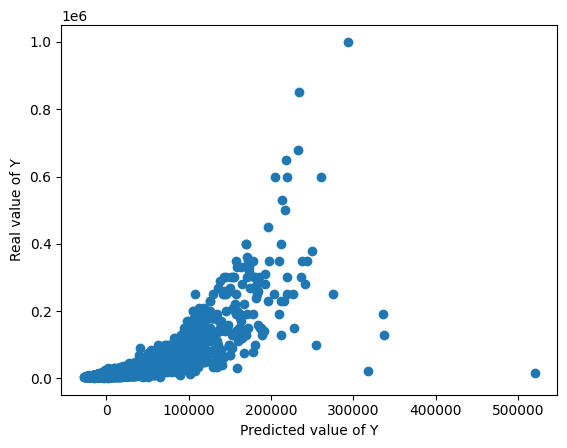

In [305]:
plt.scatter(lr.predict(X_train), y_train)
plt.xlabel('Predicted value of Y')
plt.ylabel('Real value of Y')
plt.show()

In [306]:
print("Training R2 Score - ",lr.score(X_train,y_train))
print("Test R2 Score - ",lr.score(X_test,y_test))

Training R2 Score -  0.5975572854789989
Test R2 Score -  0.5800924365184997
